# The Sparks Foundation - Data Science & Business Analytics Internship
## Author:Vishal Gupta
## Task 1: Prediction Using Supervised Machine Learning
##### In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear regression supervised Machine Learning algorithm

##### Step 1: Importing the essential packages used to solve the problem

In [1]:
# To import and read the dataset
import pandas as pd
import numpy as np
# For plotting the dataset
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Readind Data from related link

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [5]:
# Observation of the Data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# To find number of rows and columns of the dataset
df.shape

(25, 2)

In [7]:
# To find information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# To check if the dataset contains null or missing values 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### Step2:Visualizing the dataset

<Figure size 1152x648 with 0 Axes>

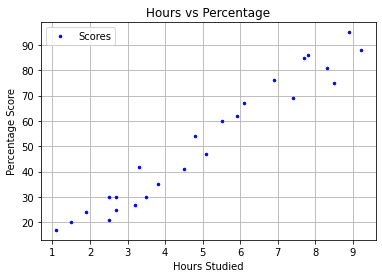

In [54]:
# Pllotting the dataset
plt.figure(figsize=(16,9))
df.plot(x='Hours',y='Scores',style='.',color='blue',markersize=5)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

##### From the above graph we can observe that there is a linear relation between 'Hours Studied' and 'Percentage score'.So we can use the linear regression model to predict future values

In [15]:
# To determine the corelation among the data we can also use .corr method
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### Step3:Data Preparation
###### In this step the data is divided into 'Features' (inputs) and 'Labels' (outputs).After that the whole dataset is split into 2 parts testing data and training data.

In [16]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [39]:
# Using the iloc function to divide the data
X = df.iloc[:,:1].values
Y = df.iloc[:,1:].values

In [40]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [41]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [42]:
# Splitting the data into testing data and training data 


from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

##### Step4:Training the Algorithm
###### The data is splitted and now the model will be trained 

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

##### Step5:Visualizing the Model

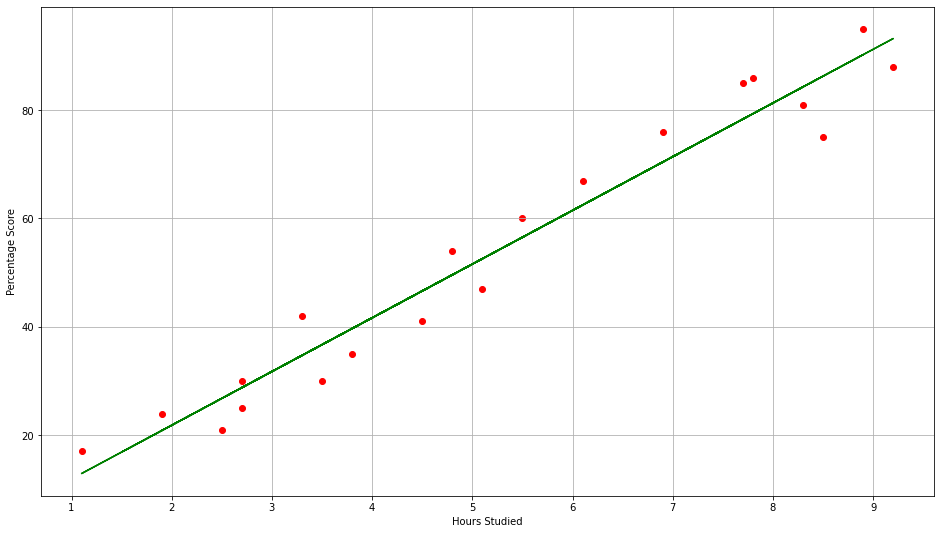

In [44]:
line = model.coef_*X + model.intercept_
# Plotting for the training data
plt.figure(figsize=(16,9))
plt.scatter(X_train,Y_train,color='red')
plt.plot(X,line,color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

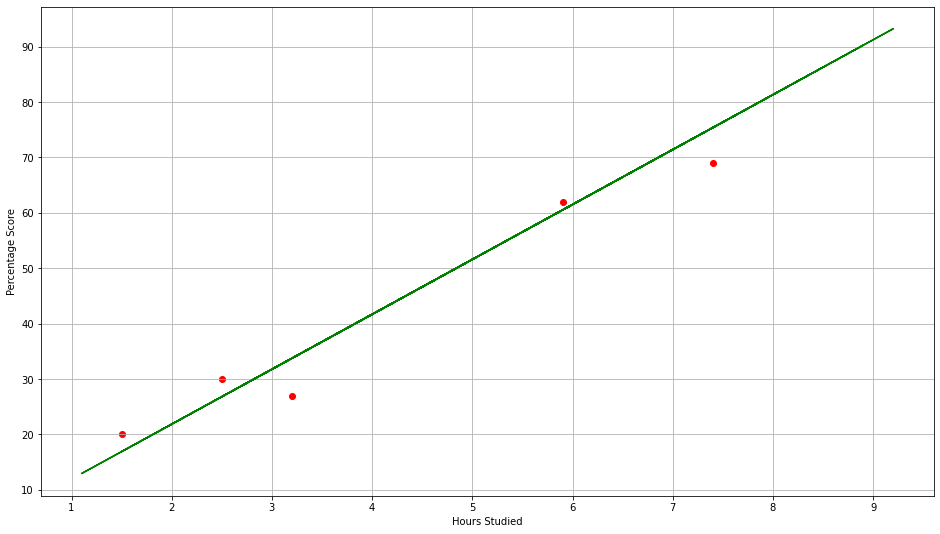

In [45]:
# Plotting for the testing data
plt.figure(figsize=(16,9))
plt.scatter(X_test,Y_test,color='red')
plt.plot(X,line,color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

##### Step6:Making Predictions

In [46]:
print(X_test)#Testing data in Hours
Y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
# Compairing Actual vs Predicted 

Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [48]:
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [49]:
# Compairing Actual vs Predicted 
comp = pd.DataFrame({'Actual':[Y_test],'Predicted':[Y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [52]:
# Testing with own data 
hours = 9.25
own_pred = model.predict([[hours]])
print('The predicted score if a person studies for',hours,'hours is',own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


##### Step7:Evaluating the model


In [53]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error: 4.183859899002975
